In [1]:
#sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[1])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')


# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandapower as pp
import pandapower.networks as net
import pandapower.topology as top
import pandapower.plotting as plot
import pandapower.converter
import pandapower.estimation

pd.set_option('display.max_columns', 100)

# Power System - case9

In [2]:
net = pandapower.networks.case9()
net

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)

In [3]:
net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.1,0.9,1,b,345.0,1.0
1,True,1.1,0.9,2,b,345.0,1.0
2,True,1.1,0.9,3,b,345.0,1.0
3,True,1.1,0.9,4,b,345.0,1.0
4,True,1.1,0.9,5,b,345.0,1.0
5,True,1.1,0.9,6,b,345.0,1.0
6,True,1.1,0.9,7,b,345.0,1.0
7,True,1.1,0.9,8,b,345.0,1.0
8,True,1.1,0.9,9,b,345.0,1.0


In [4]:
net.load

,bus,const_i_percent,const_z_percent,controllable,in_service,name,p_mw,q_mvar,scaling,sn_mva,type
0,4,0.0,0.0,False,True,None,90.0,30.0,1.0,NaN,None
1,6,0.0,0.0,False,True,None,100.0,35.0,1.0,NaN,None
2,8,0.0,0.0,False,True,None,125.0,50.0,1.0,NaN,None


In [5]:
pp.create_sgen(net, bus=3, p_mw=50, q_mvar=15, controllable=False)
pp.create_sgen(net, bus=5, p_mw=30, q_mvar=10, controllable=False)

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,controllable
0,None,3,50.0,15.0,NaN,1.0,True,wye,True,False
1,None,5,30.0,10.0,NaN,1.0,True,wye,True,False


In [6]:
net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,1,True,True,None,163.0,1.0,NaN,None,1.0,False,300.0,10.0,300.0,-300.0,0.0
1,2,True,True,None,85.0,1.0,NaN,None,1.0,False,270.0,10.0,300.0,-300.0,0.0


In [7]:
net.ext_grid 

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,0,True,None,0.0,1.0,250.0,10.0,300.0,-300.0,1.0


In [8]:
net.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,0.000000,1.0,0,0.0,True,1.0,0.418370,100.0,None,1,0.000000,None,3,ol,68.558400
1,352.117636,1.0,3,0.0,True,1.0,0.418370,100.0,None,1,20.234250,None,4,ol,109.503000
2,797.836164,1.0,4,0.0,True,1.0,0.251022,100.0,None,1,46.419750,None,5,ol,202.342500
3,0.000000,1.0,2,0.0,True,1.0,0.502044,100.0,None,1,0.000000,None,5,ol,69.748650
4,465.775861,1.0,5,0.0,True,1.0,0.251022,100.0,None,1,14.163975,None,6,ol,119.977200
5,332.060303,1.0,6,0.0,True,1.0,0.418370,100.0,None,1,10.117125,None,7,ol,85.698000
6,0.000000,1.0,7,0.0,True,1.0,0.418370,100.0,None,1,0.000000,None,1,ol,74.390625
7,681.949347,1.0,7,0.0,True,1.0,0.418370,100.0,None,1,38.088000,None,8,ol,191.630250
8,392.232304,1.0,8,0.0,True,1.0,0.418370,100.0,None,1,11.902500,None,3,ol,101.171250


In [9]:
net.poly_cost

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,ext_grid,150.0,5.0,0.1100,0.0,0.0,0.0
1,0,gen,600.0,1.2,0.0850,0.0,0.0,0.0
2,1,gen,335.0,1.0,0.1225,0.0,0.0,0.0


1 in collections is of unknown type. Skipping


Arc: Arc(xy=(4.45003, 2.91221), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(2.45003, -0.087788), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)


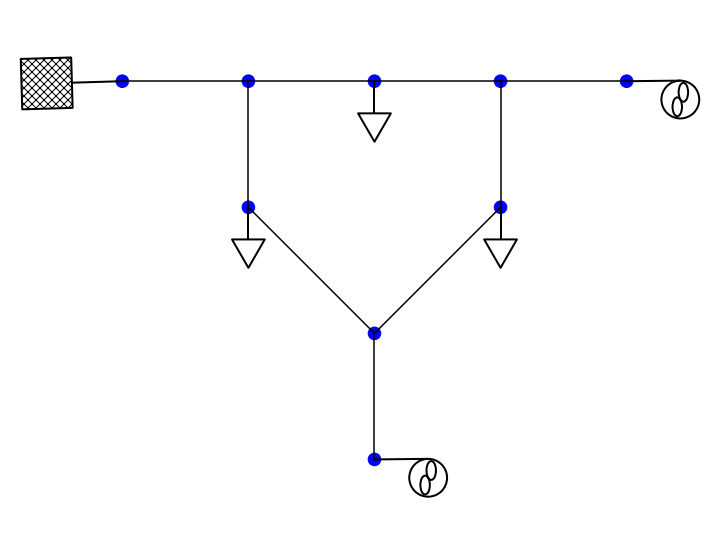

In [10]:
net.bus_geodata['x'] = pd.Series([0,4,2,1,1,2,3,3,2])
net.bus_geodata['y'] = pd.Series([3,3,0,3,2,1,2,3,3])
#net.bus_geodata

import pylab

def plot_net():
    bus_col = plot.create_bus_collection(net, color="b", size=0.05, picker=True)
    trafo_col = plot.create_trafo_collection(net, size=0.1)
    line_col = plot.create_line_collection(net, color="k", use_bus_geodata=True)
    ext_grid_col = plot.create_ext_grid_collection(net, size=0.2, orientation=-1.6)
    load_col = plot.create_load_collection(net, size=0.15, orientation=np.pi)
    #sgen_col = plot.create_sgen_collection(net, size=0.15, orientation=np.pi)
    gen_col = plot.create_gen_collection(net, size=0.15, orientation=1.9)
    #sgen_col = plt.create_sgen_collections(net, size=0.1, infofunc=None, orientation=np.pi)
    plot.draw_collections([bus_col, trafo_col, line_col,
                          ext_grid_col, load_col, gen_col], figsize=(10, 8))
    pylab.show()

plot_net()

# OPF

In [11]:
pp.runopp(net)

Pg_0_base = net.res_ext_grid['p_mw'][0]
Pg_1_base = net.res_gen['p_mw'][0]
Pg_2_base = net.res_gen['p_mw'][1]

Pg_base = np.concatenate([np.array(net.res_ext_grid['p_mw']), np.array(net.res_gen['p_mw'])], axis=0)

print('Pg0 base', Pg_0_base)
print('Pg1 base', Pg_1_base)
print('Pg2 base', Pg_2_base)

Pg0 base 63.671836015986685
Pg1 base 102.76054314465793
Pg2 base 71.83524796926079


In [12]:
a_gen = np.sum(Pg_base)
a_rs = np.sum(net.sgen['p_mw'])
a_load = np.sum(net.load['p_mw'])

diff = a_gen+a_rs-a_load

d = diff*100/(a_load-a_rs)
d = d/100
pro = 1+d
pro

1.0139048005166256

In [13]:
# Load base
L_P_base = net.load['p_mw']
L_Q_base = net.load['q_mvar']

# RS base
RS_P_base = net.sgen['p_mw']
RS_Q_base = net.sgen['q_mvar']

# Load factor
faktor_load = L_Q_base/L_P_base
# RS factor
faktor_rs = RS_Q_base/RS_P_base


np.random.seed(123)

# Num of iteration
num_sampling =1000

# Load - Uniform random
alpha_corr = np.random.lognormal(-1, 0.1, num_sampling)

alpha_uncorr = []
for i in range(L_P_base.shape[0]):
    alp_unc = list(np.random.lognormal(1, 0.05, num_sampling))
    alpha_uncorr.append(alp_unc)
    
alpha_uncorr = np.array(alpha_uncorr)

# RS - Uniform random
beta_corr = np.random.uniform(0.2, 0.4, num_sampling)


beta_uncorr = []
for i in range(RS_P_base.shape[0]):
    beta_unc = list(np.random.lognormal(1, 0.3, num_sampling))
    beta_uncorr.append(beta_unc)
    
beta_uncorr = np.array(beta_uncorr)


# Control change
u = []
for i in range(3):
    u_con = list(np.random.uniform(0.8, 1.2, num_sampling))
    u.append(u_con)

u = np.array(u)

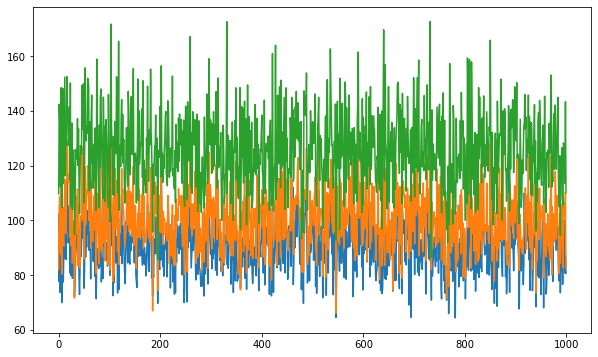

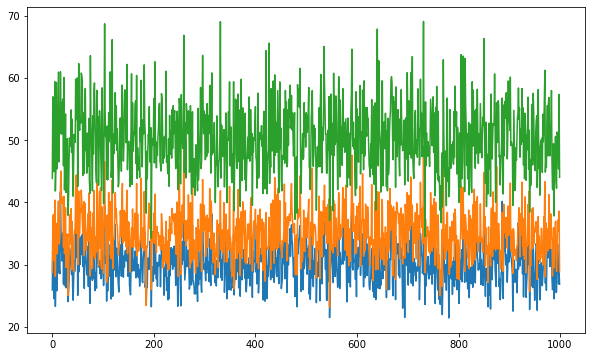

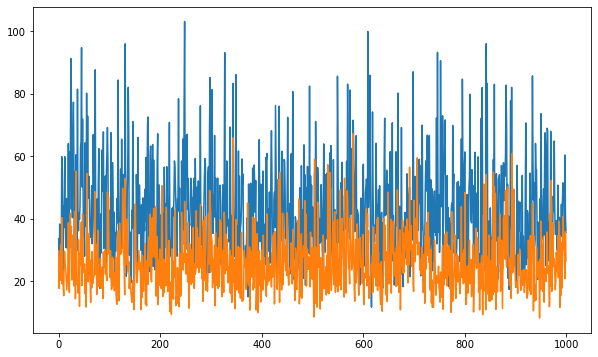

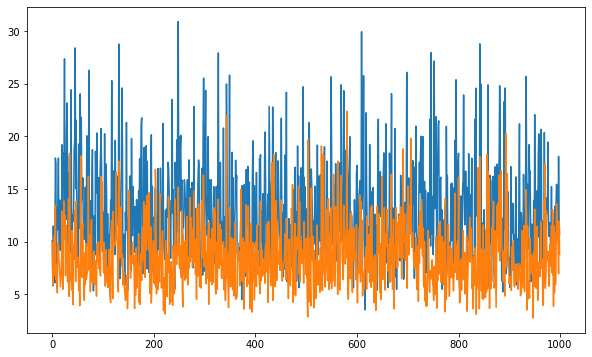

In [14]:
# Load
P_load = []
for i in range(L_P_base.shape[0]):
    load = list(L_P_base[i] * alpha_corr * alpha_uncorr[i])
    P_load.append(load)
    
P_load = np.array(P_load)

Q_load = []
for i in range(L_P_base.shape[0]):
    load = list(P_load[i] * faktor_load[i])
    Q_load.append(load)
    
Q_load = np.array(Q_load)

plt.figure(figsize=(10,6))
for i in range(P_load.shape[0]):
    plt.plot(P_load[i])
    
plt.figure(figsize=(10,6))
for i in range(Q_load.shape[0]):
    plt.plot(Q_load[i])

    
# RS    
P_rs = []
for i in range(RS_P_base.shape[0]):
    rs = list(RS_P_base[i] * beta_corr * beta_uncorr[i])
    P_rs.append(rs)
    
P_rs = np.array(P_rs)


Q_rs = []
for i in range(RS_P_base.shape[0]):
    rs = list(P_rs[i] * faktor_rs[i])
    Q_rs.append(rs)
    
Q_rs = np.array(Q_rs)

plt.figure(figsize=(10,6))
for i in range(P_rs.shape[0]):
    plt.plot(np.abs(P_rs[i]))
    
plt.figure(figsize=(10,6))
for i in range(Q_rs.shape[0]):
    plt.plot(np.abs(Q_rs[i]))

RS0 11.696794908708927 103.09312893074681
RS1 8.22501450370889 67.19358063837154


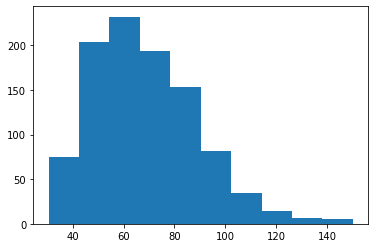

In [15]:
plt.hist(np.abs(P_rs[0]+P_rs[1]))
print('RS0',P_rs[0].min(), P_rs[0].max())
print('RS1',P_rs[1].min(), P_rs[1].max())

RS0 64.30927743423287 124.99968141036706
RS1 66.19694958894317 141.46659000716292
RS2 85.50933292000995 172.62840253896874


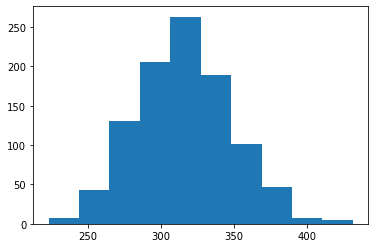

In [16]:
plt.hist(P_load[0]+P_load[1]+P_load[2])
print('RS0',P_load[0].min(), P_load[0].max())
print('RS1',P_load[1].min(), P_load[1].max())
print('RS2',P_load[2].min(), P_load[2].max())

# PF

In [17]:
n = net.gen.shape[0]

V_m = pd.DataFrame([])
V_deg = pd.DataFrame([])
P = pd.DataFrame([])
Q = pd.DataFrame([])

P_ij = pd.DataFrame([])

Pg = pd.DataFrame()
Pg_0 = pd.DataFrame()
load_p = pd.DataFrame()
load_q = pd.DataFrame() 
rs_p = pd.DataFrame()
rs_q = pd.DataFrame()

P_disturbance = np.concatenate([P_load, P_rs], axis=0) 
Q_disturbance = np.concatenate([Q_load, Q_rs], axis=0)

for i in range(num_sampling):
    
    net.load['p_mw'] = pd.Series(P_load[:,i])
    net.load['q_mvar'] = pd.Series(Q_load[:,i])
    
    net.sgen['p_mw'] = pd.Series(P_rs[:,i])
    net.sgen['q_mvar'] = pd.Series(Q_rs[:,i])
    
    load_p = pd.concat([load_p, net.load['p_mw']], axis=1)
    load_q = pd.concat([load_q, net.load['q_mvar']], axis=1)
    
    rs_p = pd.concat([rs_p, net.sgen['p_mw']], axis=1)
    rs_q = pd.concat([rs_q, net.sgen['q_mvar']], axis=1)
    
    sum_load = net.load['p_mw'].sum() - net.sgen['p_mw'].sum()

    P_first = []
    for j in range(Pg_base.shape[0]):
        p = Pg_base[j] * u[j, i] * pro * (sum_load/np.sum(Pg_base))
        P_first.append(p)
    P_first = np.array(P_first)
    
    net.ext_grid['p_mw'] = pd.Series(P_first[0] * pro  * (sum_load/np.sum(P_first)))
    net.gen['p_mw'] = pd.Series(P_first[1:] * pro * (sum_load/np.sum(P_first)))
    
    Pg_0 = pd.concat([Pg_0, net.ext_grid['p_mw']], axis=1)
    Pg = pd.concat([Pg, net.gen['p_mw']] , axis=1)
    
    pp.runpp(net)
    
    
    V_m = V_m.append(pd.DataFrame(net.res_bus['vm_pu']).T)
    V_deg = V_deg.append(pd.DataFrame(net.res_bus['va_degree']).T)
    P = P.append(pd.DataFrame(net.res_bus['p_mw']).T)
    Q = Q.append(pd.DataFrame(net.res_bus['q_mvar']).T)
    
    P_ij = P_ij.append(pd.DataFrame(net.res_line['p_from_mw']).T)
    
    if i == (num_sampling-1):
        V_m = V_m.reset_index(drop=True)
        V_deg = V_deg.reset_index(drop=True)
        P = P.reset_index(drop=True)
        Q = Q.reset_index(drop=True)
        P_ij = P_ij.reset_index(drop=True)

# Dataset

In [18]:
load_p = load_p.transpose()
load_p = load_p.reset_index()
load_p = load_p.drop(['index'], axis=1)
load_p.columns = ['Load_P1', 'Load_P2' ,'Load_P3']

rs_p = rs_p.transpose()
rs_p = rs_p.reset_index()
rs_p = rs_p.drop(['index'], axis=1)
rs_p.columns = ['RS_P1', 'RS_P2']


load_q = load_q.transpose()
load_q = load_q.reset_index()
load_q = load_q.drop(['index'], axis=1)
load_q.columns = ['Load_Q1', 'Load_Q2' ,'Load_Q3']

rs_q = rs_q.transpose()
rs_q = rs_q.reset_index()
rs_q = rs_q.drop(['index'], axis=1)
rs_q.columns = ['RS_Q1', 'RS_Q2']

In [19]:
Pg0 = pd.DataFrame(Pg_0.iloc[0])
Pg1 = pd.DataFrame(Pg.iloc[0])
Pg2 = pd.DataFrame(Pg.iloc[1])

Pg0 = Pg0.reset_index()
Pg0 = Pg0.drop(['index'], axis=1)
Pg0.columns = ['Pg0']

Pg1 = Pg1.reset_index()
Pg1 = Pg1.drop(['index'], axis=1)
Pg1.columns = ['Pg1']

Pg2 = Pg2.reset_index()
Pg2 = Pg2.drop(['index'], axis=1)
Pg2.columns = ['Pg2']

In [20]:
P.columns = ['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
Q.columns = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']
V_m.columns = ['U0', 'U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8']
V_deg.columns = ['Ud0', 'Ud1', 'Ud2', 'Ud3', 'Ud4', 'Ud5', 'Ud6', 'Ud7', 'Ud8']
P_ij.columns = ['P_03', 'P_34', 'P_45', 'P_25', 'P_56', 'P_67', 'P_71', 'P_78', 'P_83']

In [21]:
df = pd.concat([Pg0, Pg1, Pg2, load_p, load_q, rs_p, rs_q, P, Q, V_m, V_deg, P_ij], axis=1)

In [23]:
pd.set_option('display.max_columns', 100)
df.head()

,Pg0,Pg1,Pg2,Load_P1,Load_P2,Load_P3,Load_Q1,Load_Q2,Load_Q3,RS_P1,RS_P2,RS_Q1,RS_Q2,P0,P1,P2,P3,P4,P5,P6,P7,P8,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,U0,U1,U2,U3,U4,U5,U6,U7,U8,Ud0,Ud1,Ud2,Ud3,Ud4,Ud5,Ud6,Ud7,Ud8,P_03,P_34,P_45,P_25,P_56,P_67,P_71,P_78,P_83
0,59.133076,91.046121,58.858774,77.773848,82.096546,109.642025,25.924616,28.733791,43.856810,33.596406,29.744812,10.078922,9.914937,-58.856484,-91.046121,-58.858774,-33.596406,77.773848,-29.744812,82.096546,0.0,109.642025,2.350474,6.317373,23.605955,-10.078922,25.924616,-9.914937,28.733791,0.0,43.856810,1.0,1.0,1.0,1.001928,0.994936,1.014420,1.000038,1.005560,0.979805,0.0,3.157380,2.631294,-1.939037,-3.667944,0.682807,-1.691738,-0.086676,-4.767008,58.856484,33.060233,-44.899384,58.858774,42.909810,-39.411861,-91.046121,51.501723,-58.999419
1,66.599881,157.267682,92.238488,102.301461,104.046287,142.384024,34.100487,36.416200,56.953609,19.325453,17.635380,5.797636,5.878460,-68.289225,-157.267682,-92.238488,-19.325453,102.301461,-17.635380,104.046287,0.0,142.384024,-28.625599,-17.542616,4.402647,-5.797636,34.100487,-5.878460,36.416200,0.0,56.953609,1.0,1.0,1.0,0.984298,0.968655,1.004036,0.983771,0.993908,0.948376,0.0,9.338553,6.098185,-2.290268,-3.989830,3.012205,0.894783,3.663024,-4.928414,68.289225,32.793857,-69.718053,92.238488,38.135506,-66.114022,-157.267682,90.768012,-54.374524
2,79.074452,134.389013,64.829596,95.968023,108.666208,136.360049,31.989341,38.033173,54.544020,38.277040,28.240721,11.483112,9.413574,-79.420587,-134.389013,-64.829596,-38.277040,95.968023,-28.240721,108.666208,0.0,136.360049,-14.588350,-10.672416,11.381477,-11.483112,31.989341,-9.413574,38.033173,0.0,54.544020,1.0,1.0,1.0,0.992652,0.979386,1.007386,0.985971,0.996875,0.959738,0.0,5.010390,1.913795,-2.641406,-5.103047,-0.247433,-2.591240,0.177119,-6.083925,79.420587,46.620172,-49.730510,64.829596,42.331427,-66.579714,-134.389013,67.419083,-70.460191
3,49.510102,110.728146,72.459392,73.641679,89.800681,112.311358,24.547226,31.430238,44.924543,23.375186,22.872133,7.012556,7.624044,-49.481764,-110.728146,-72.459392,-23.375186,73.641679,-22.872133,89.800681,0.0,112.311358,-2.964563,1.712063,19.577410,-7.012556,24.547226,-7.624044,31.430238,0.0,44.924543,1.0,1.0,1.0,0.998699,0.992960,1.012363,0.996245,1.003459,0.975007,0.0,5.757109,4.653073,-1.635364,-2.799237,2.249231,-0.125910,1.802480,-4.028748,49.481764,22.324345,-51.403202,72.459392,42.880168,-47.150686,-110.728146,63.385933,-50.224048
4,74.088754,104.415714,69.420999,86.981422,87.469644,129.760427,28.993807,30.614375,51.904171,28.081316,31.604788,8.424395,10.534929,-74.322851,-104.415714,-69.420999,-28.081316,86.981422,-31.604788,87.469644,0.0,129.760427,-10.644654,-1.099562,18.777980,-8.424395,28.993807,-10.534929,30.614375,0.0,51.904171,1.0,1.0,1.0,0.994790,0.985441,1.011822,0.995288,1.001441,0.965592,0.0,3.763322,3.242836,-2.466437,-4.250579,0.938615,-1.657588,0.026943,-5.770507,74.322851,33.978340,-53.204661,69.420999,46.684088,-41.055929,-104.415714,63.214346,-67.873473


In [24]:
df.describe()

,Pg0,Pg1,Pg2,Load_P1,Load_P2,Load_P3,Load_Q1,Load_Q2,Load_Q3,RS_P1,RS_P2,RS_Q1,RS_Q2,P0,P1,P2,P3,P4,P5,P6,P7,P8,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,U0,U1,U2,U3,U4,U5,U6,U7,U8,Ud0,Ud1,Ud2,Ud3,Ud4,Ud5,Ud6,Ud7,Ud8,P_03,P_34,P_45,P_25,P_56,P_67,P_71,P_78,P_83
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.327486,107.848401,75.875898,90.221254,100.259705,125.682814,30.073751,35.090897,50.273126,42.706655,25.848284,12.811996,8.616095,-67.515772,-107.848401,-75.875898,-42.706655,90.221254,-25.848284,100.259705,0.0,125.682814,-6.920674,-3.810360,14.531825,-12.811996,30.073751,-8.616095,35.090897,0.0,50.273126,1.0,1.000000e+00,1.000000e+00,0.996801,0.984939,1.009530,0.990568,0.999966,0.968099,0.0,3.601079,3.052184,-2.237970,-4.361274,0.526459,-2.313586,-0.266610,-5.591898,67.515772,40.641524,-49.880639,75.875898,50.807165,-49.786940,-107.848401,57.833971,-69.003845
std,12.647903,18.946129,14.004948,9.889566,11.017076,13.874682,3.296522,3.855977,5.549873,15.501674,9.460812,4.650502,3.153604,12.796164,18.946129,14.004948,15.501674,9.889566,9.460812,11.017076,0.0,13.874682,10.668511,7.601784,6.515294,4.650502,3.296522,3.153604,3.855977,0.0,5.549873,0.0,1.455501e-16,1.434152e-16,0.005914,0.008708,0.003520,0.006172,0.004048,0.010736,0.0,1.690159,1.334089,0.434502,0.705986,1.067584,1.105898,1.174581,0.806701,12.796164,7.712058,8.622159,14.004948,8.411371,9.769679,18.946129,11.182085,9.852687
min,26.322199,51.043491,34.186272,64.309277,66.196950,85.509333,21.436426,23.168932,34.203733,11.696795,8.225015,3.509038,2.741672,-116.034781,-176.123871,-128.981432,-103.093129,64.309277,-67.193581,66.196950,0.0,85.509333,-43.147517,-36.757346,-8.961267,-30.927939,21.436426,-22.397860,23.168932,0.0,34.203733,1.0,1.000000e+00,1.000000e+00,0.977435,0.954689,0.996207,0.965463,0.983208,0.928912,0.0,-1.508188,-0.923433,-3.920889,-7.269772,-2.779214,-5.626530,-3.790543,-8.550465,26.708616,21.184333,-76.866725,34.186272,30.474415,-91.002774,-176.123871,22.051236,-102.581335
25%,58.523253,95.176695,66.586935,83.329053,92.669152,116.211957,27.776351,32.434203,46.484783,31.392448,18.943681,9.417734,6.314560,-76.259659,-120.464337,-84.842674,-51.449087,83.329053,-30.885578,92.669152,0.0,116.211957,-14.092572,-8.676556,10.022007,-15.434726,27.776351,-10.295193,32.434203,0.0,46.484783,1.0,1.000000e+00,1.000000e+00,0.992880,0.979570,1.007118,0.986466,0.997292,0.961025,0.0,2.417299,2.101303,-2.528367,-4.821312,-0.247683,-3.081443,-1.105484,-6.085577,58.627945,35.312455,-55.406248,66.586935,44.813968,-56.242033,-120.464337,50.402460,-74.917962
50%,66.350782,106.651498,75.616361,90.024514,99.641952,125.149306,30.008171,34.874683,50.059722,39.966311,24.253107,11.989893,8.084369,-66.731154,-106.651498,-75.616361,-39.966311,90.024514,-24.253107,99.641952,0.0,125.149306,-6.821836,-3.229145,14.855114,-11.989893,30.008171,-8.084369,34.874683,0.0,50.059722,1.0,1.000000e+00,1.000000e+00,0.996784,0.985330,1.009654,0.991034,1.000289,0.968775,0.0,3.581474,2.970875,-2.207402,-4.314902,0.498588,-2.293111,-0.254460,-5.520943,66.731154,40.271385,-49.640467,75.616361,50.104902,-49.228098,-106.651498,57.655299,-68.282817
75%,75.858453,120.464337,84.842674,96.534155,107.309033,135.113908,32.178052,37.558161,54.045563,51.449087,30.885578,15.434726,10.295193,-58.627945,-95.176695,-66.586935,-31.392448,96.534155,-18.943681,107.309033,0.0,135.113908,0.407734,1.349637

# Save

In [28]:
df.to_csv(module_path + '\\IEEE9\\datasets\\dataset_pandapower_AC.csv')